In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
#importing data frame for df1
df =  pd.read_csv('amazon_cells_labelled.txt', sep='\t' , engine='python',names=['review','label'])

In [3]:
#importing data frame for df2
df2 = pd.read_csv('yelp_labelled.txt', sep='\t' , engine='python',names=['review','label'])

In [4]:
#importing data frame for df3
df3 =  pd.read_csv('imdb_labelled.txt', sep='\t' , quoting=3, engine='python',names=['review','label'])

In [5]:
#appending the three dataframes
df = df.append([df2,df3])

In [6]:
df

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


In [7]:
#viewing head
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [8]:
#finding unique messages
# 1493 unique positive reviews, 1490 unique negative reviews
df.groupby('label').describe()

review                                               
       count unique                                top freq
label                                                      
0       1500   1493  I would not recommend this place.    2
1       1500   1490   Definitely worth checking out.      2

In [9]:
#adding message length as column
df['length'] = df['review'].apply(len)

In [10]:
df.head()

,review,label,length
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22
3,Tied to charger for conversations lasting more...,0,79
4,The mic is great.,1,17


In [11]:
#65 word sentence reviews - before processing 
df.length.describe()

count    3000.000000
mean       65.277000
std        44.170548
min         7.000000
25%        33.000000
50%        55.500000
75%        88.000000
max       479.000000
Name: length, dtype: float64

<AxesSubplot:title={'center':'Review Length'}, xlabel='Word Sentence Length', ylabel='Frequency'>

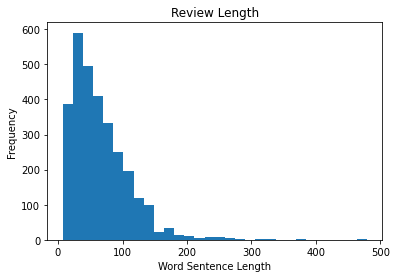

In [12]:
#visualizing message length - before processing 
%matplotlib inline
plt.title("Review Length")
plt.xlabel("Word Sentence Length")
plt.ylabel("Frequency")
df['length'].plot.hist(bins=30)

In [13]:
# Preprocessing
#removing puncuation
import re
import string

def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)
string.punctuation
df["review"] = df.review.map(remove_punct)

In [14]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.review)

In [15]:
len(counter)

6127

In [16]:
# Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine
# has been programmed to ignore, both when indexing entries for searching and when retrieving them 
# as the result of a search query.
stop = set(stopwords.words("english"))
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [17]:
df['review'] = df.review.map(remove_stopwords)

In [18]:
#message length info - post processing 
df['length'].describe()
df['length'] = df['review'].apply(len)

In [19]:
#processed dataframe
df.head()

,review,label,length
0,way plug us unless go converter,0,31
1,good case excellent value,1,25
2,great jawbone,1,13
3,tied charger conversations lasting 45 minutesm...,0,59
4,mic great,1,9


In [20]:
#processed dataframe stats 
df.length.describe()

count    3000.000000
mean       41.302333
std        29.807903
min         3.000000
25%        20.000000
50%        34.000000
75%        55.000000
max       348.000000
Name: length, dtype: float64

In [21]:
#writing processed data to csv
df.to_csv('prepared_dataset_d213.csv')

<AxesSubplot:title={'center':'Word Sentence Length'}, xlabel='Word Frequency', ylabel='Frequency'>

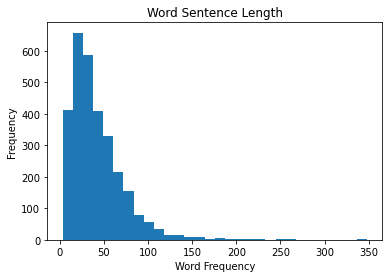

In [22]:
#visualizing message length
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.title("Word Sentence Length")
plt.xlabel("Word Frequency")
plt.ylabel("Sentence Length")
df['length'].plot.hist(bins=30)

In [23]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count
counter = counter_word(df.review)

In [24]:
#number of unique words
len(counter)

5279

In [25]:
#top 5 most used words
counter.most_common(5)

[('good', 226), ('great', 207), ('movie', 177), ('phone', 162), ('film', 155)]

In [26]:
num_unique_words = len(counter)

In [27]:
# Split dataset into training and validation set
train_size = int(df.shape[0] * 0.8)

train_df = df[:train_size]
val_df = df[train_size:]

# split text and labels
train_sentences = train_df.review.to_numpy()
train_labels = train_df.label.to_numpy()
val_sentences = val_df.review.to_numpy()
val_labels = val_df.label.to_numpy()

In [28]:
train_sentences.shape, val_sentences.shape

((2400,), (600,))

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [30]:
# each word has unique index
word_index = tokenizer.word_index

In [31]:
word_index

{'good': 1,
 'great': 2,
 'phone': 3,
 'food': 4,
 'place': 5,
 'service': 6,
 'one': 7,
 'like': 8,
 'time': 9,
 'really': 10,
 'movie': 11,
 'would': 12,
 'back': 13,
 'dont': 14,
 'well': 15,
 'best': 16,
 'quality': 17,
 'go': 18,
 'ever': 19,
 'also': 20,
 'product': 21,
 'ive': 22,
 'even': 23,
 'bad': 24,
 'works': 25,
 'im': 26,
 'get': 27,
 'nice': 28,
 'film': 29,
 'headset': 30,
 'love': 31,
 'work': 32,
 'battery': 33,
 'sound': 34,
 'use': 35,
 'excellent': 36,
 'recommend': 37,
 'could': 38,
 'made': 39,
 'much': 40,
 'never': 41,
 'better': 42,
 'think': 43,
 'first': 44,
 'ear': 45,
 'didnt': 46,
 'pretty': 47,
 'price': 48,
 'worst': 49,
 'make': 50,
 'disappointed': 51,
 'got': 52,
 'way': 53,
 'case': 54,
 '2': 55,
 'say': 56,
 'enough': 57,
 'definitely': 58,
 'going': 59,
 'thing': 60,
 'minutes': 61,
 'friendly': 62,
 'money': 63,
 'new': 64,
 'everything': 65,
 'experience': 66,
 'came': 67,
 'amazing': 68,
 'still': 69,
 'right': 70,
 'two': 71,
 'every': 72,
 '

In [32]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [33]:
print(train_sentences[10:15])
print(train_sequences[10:15])

['sound quality great' 'impressed going original battery extended battery'
 'two seperated mere 5 ft started notice excessive static garbled sound headset'
 'good quality though' 'design odd ear clip comfortable']
[[34, 17, 2], [111, 59, 429, 33, 1038, 33], [71, 1560, 1561, 131, 1562, 279, 1039, 1563, 748, 1564, 34, 30], [1, 17, 215], [216, 1565, 45, 594, 101]]


In [34]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 41

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((2400, 41), (600, 41))

In [35]:
train_padded[10]

array([34, 17,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

In [36]:
print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

sound quality great
[34, 17, 2]
[34 17  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [37]:
# Check reversing the indices

# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [38]:
reverse_word_index

{1: 'good',
 2: 'great',
 3: 'phone',
 4: 'food',
 5: 'place',
 6: 'service',
 7: 'one',
 8: 'like',
 9: 'time',
 10: 'really',
 11: 'movie',
 12: 'would',
 13: 'back',
 14: 'dont',
 15: 'well',
 16: 'best',
 17: 'quality',
 18: 'go',
 19: 'ever',
 20: 'also',
 21: 'product',
 22: 'ive',
 23: 'even',
 24: 'bad',
 25: 'works',
 26: 'im',
 27: 'get',
 28: 'nice',
 29: 'film',
 30: 'headset',
 31: 'love',
 32: 'work',
 33: 'battery',
 34: 'sound',
 35: 'use',
 36: 'excellent',
 37: 'recommend',
 38: 'could',
 39: 'made',
 40: 'much',
 41: 'never',
 42: 'better',
 43: 'think',
 44: 'first',
 45: 'ear',
 46: 'didnt',
 47: 'pretty',
 48: 'price',
 49: 'worst',
 50: 'make',
 51: 'disappointed',
 52: 'got',
 53: 'way',
 54: 'case',
 55: '2',
 56: 'say',
 57: 'enough',
 58: 'definitely',
 59: 'going',
 60: 'thing',
 61: 'minutes',
 62: 'friendly',
 63: 'money',
 64: 'new',
 65: 'everything',
 66: 'experience',
 67: 'came',
 68: 'amazing',
 69: 'still',
 70: 'right',
 71: 'two',
 72: 'every',
 7

In [39]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [40]:

decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[34, 17, 2]
sound quality great


In [41]:
# Create LSTM model
from tensorflow.keras import layers

# Embedding: https://www.tensorflow.org/tutorials/text/word_embeddings
# Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

# Word embeddings give us a way to use an efficient, dense representation in which similar words have 
# a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a 
# dense vector of floating point values (the length of the vector is a parameter you specify).

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 64, input_length=max_length))

# The layer will take as input an integer matrix of size (batch, input_length),
# and the largest integer (i.e. word index) in the input should be no larger than num_words (vocabulary size).
# Now model.output_shape is (None, input_length, 32), where `None` is the batch dimension.


model.add(layers.LSTM(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 41, 64)            337856    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 370,945
Trainable params: 370,945
Non-trainable params: 0
_________________________________________________________________


In [42]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [45]:
history = model.fit(train_padded, train_labels, epochs=30, validation_data=(val_padded, val_labels), verbose=2, callbacks=[callback])

Epoch 1/30
75/75 - 1s - loss: 0.3071 - accuracy: 0.8954 - val_loss: 0.6973 - val_accuracy: 0.7017
Epoch 2/30
75/75 - 1s - loss: 0.3073 - accuracy: 0.8946 - val_loss: 0.6982 - val_accuracy: 0.7000
Epoch 3/30
75/75 - 1s - loss: 0.2870 - accuracy: 0.9046 - val_loss: 0.7316 - val_accuracy: 0.7117
Epoch 4/30
75/75 - 1s - loss: 0.2860 - accuracy: 0.9062 - val_loss: 0.6984 - val_accuracy: 0.7150
Epoch 5/30
75/75 - 1s - loss: 0.2755 - accuracy: 0.9104 - val_loss: 0.7159 - val_accuracy: 0.7167
Epoch 6/30
75/75 - 1s - loss: 0.2683 - accuracy: 0.9133 - val_loss: 0.7335 - val_accuracy: 0.7200
Epoch 7/30
75/75 - 1s - loss: 0.2697 - accuracy: 0.9142 - val_loss: 0.7341 - val_accuracy: 0.7233
Epoch 8/30
75/75 - 1s - loss: 0.2581 - accuracy: 0.9192 - val_loss: 0.7133 - val_accuracy: 0.7267
Epoch 9/30
75/75 - 1s - loss: 0.2887 - accuracy: 0.9125 - val_loss: 0.6733 - val_accuracy: 0.7383
Epoch 10/30
75/75 - 1s - loss: 0.2677 - accuracy: 0.9196 - val_loss: 0.7066 - val_accuracy: 0.7400
Epoch 11/30
75/75 -

In [46]:
predictions = model.predict(train_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

In [47]:
print(train_sentences[10:20])

print(train_labels[10:20])
print(predictions[10:20])

['sound quality great' 'impressed going original battery extended battery'
 'two seperated mere 5 ft started notice excessive static garbled sound headset'
 'good quality though' 'design odd ear clip comfortable'
 'highly recommend one blue tooth phone' 'advise everyone fooled'
 'far good' 'works great'
 'clicks place way makes wonder long mechanism would last']
[1 1 0 1 0 1 0 1 1 0]
[1, 0, 0, 1, 0, 1, 0, 1, 1, 0]


[0.30710527300834656,
 0.30729737877845764,
 0.2870224118232727,
 0.28596925735473633,
 0.27552199363708496,
 0.2683013081550598,
 0.26966241002082825,
 0.25808870792388916,
 0.2887131869792938,
 0.2676750123500824,
 0.2616409957408905]

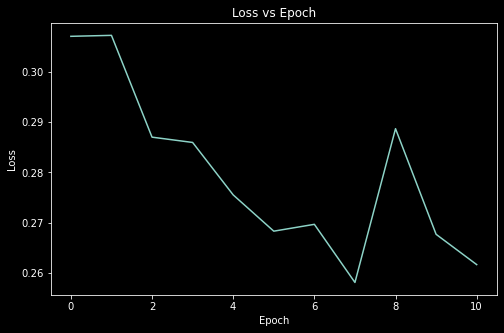

In [48]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
plt.style.use("dark_background")
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.epoch,history.history['loss'])
history.history['loss']

In [49]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [50]:
model.save_weights('./checkpoints/my_checkpoint')

[0.30710527300834656,
 0.30729737877845764,
 0.2870224118232727,
 0.28596925735473633,
 0.27552199363708496,
 0.2683013081550598,
 0.26966241002082825,
 0.25808870792388916,
 0.2887131869792938,
 0.2676750123500824,
 0.2616409957408905]

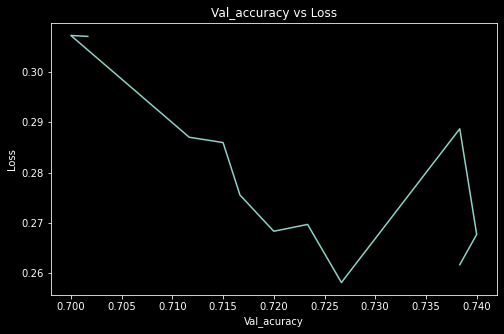

In [51]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
plt.style.use("dark_background")
plt.title("Val_accuracy vs Loss")
plt.xlabel("Val_acuracy")
plt.ylabel("Loss")
plt.plot(history.history['val_accuracy'],history.history['loss'])
history.history['loss']